In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(CellChat))
suppressMessages(library(foreach))

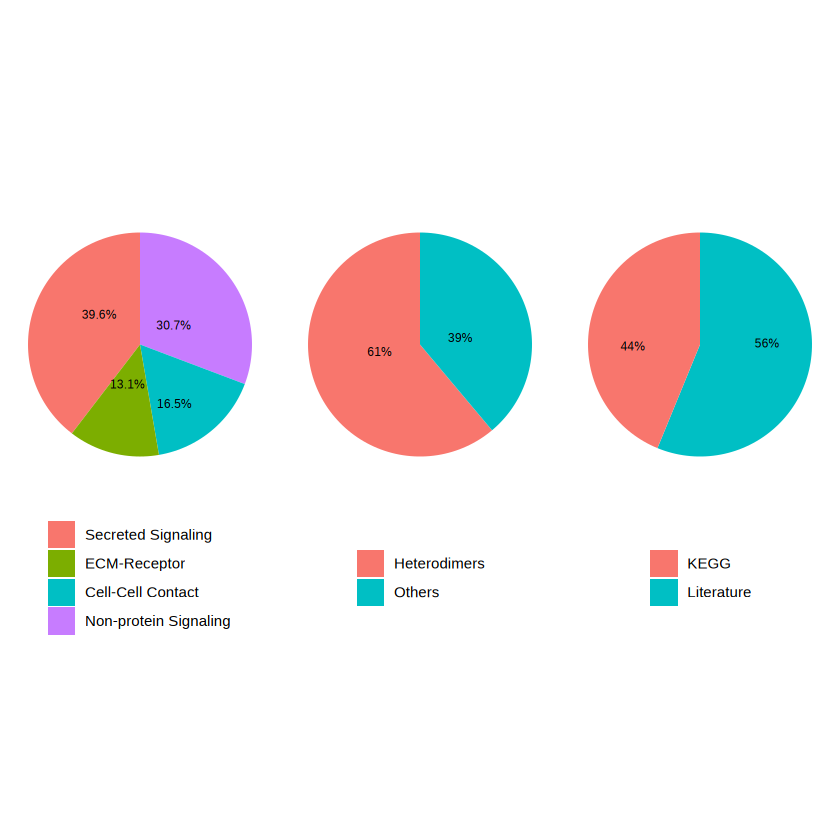

In [2]:
CellChatDB <- CellChatDB.human
showDatabaseCategory(CellChatDB)
CellChatDB.use <- subsetDB(CellChatDB)

In [3]:
df <- as.data.frame(unique(CellChatDB.use$interaction$pathway_name))

In [4]:
cellchat <- readRDS("../../results/11_mac_endo/02_run_cellchat/obj.rds")

In [5]:
groupSize <- as.numeric(table(cellchat@idents))

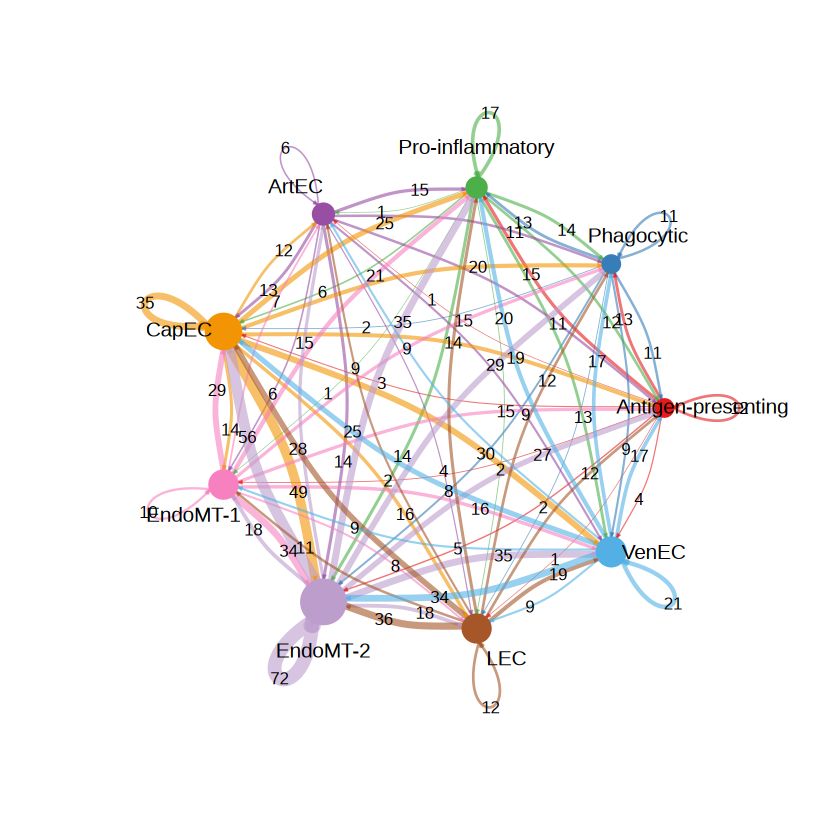

In [6]:
p <- netVisual_circle(cellchat@net$count, 
                      vertex.weight = rowSums(cellchat@net$count), 
                      weight.scale = T, label.edge= T)

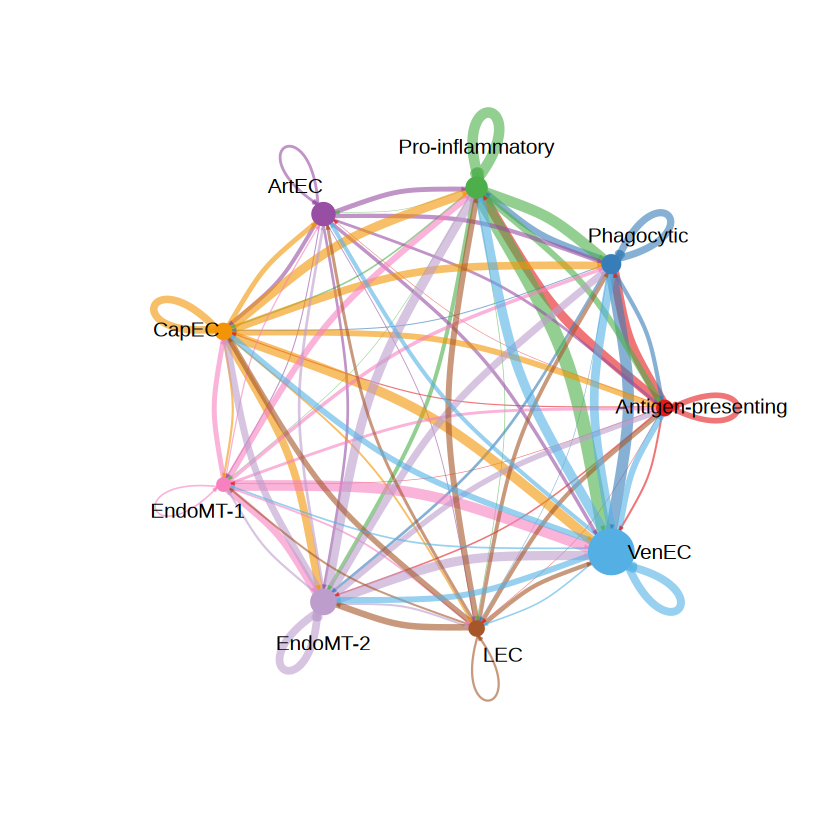

In [7]:
p <- netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, 
                 weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

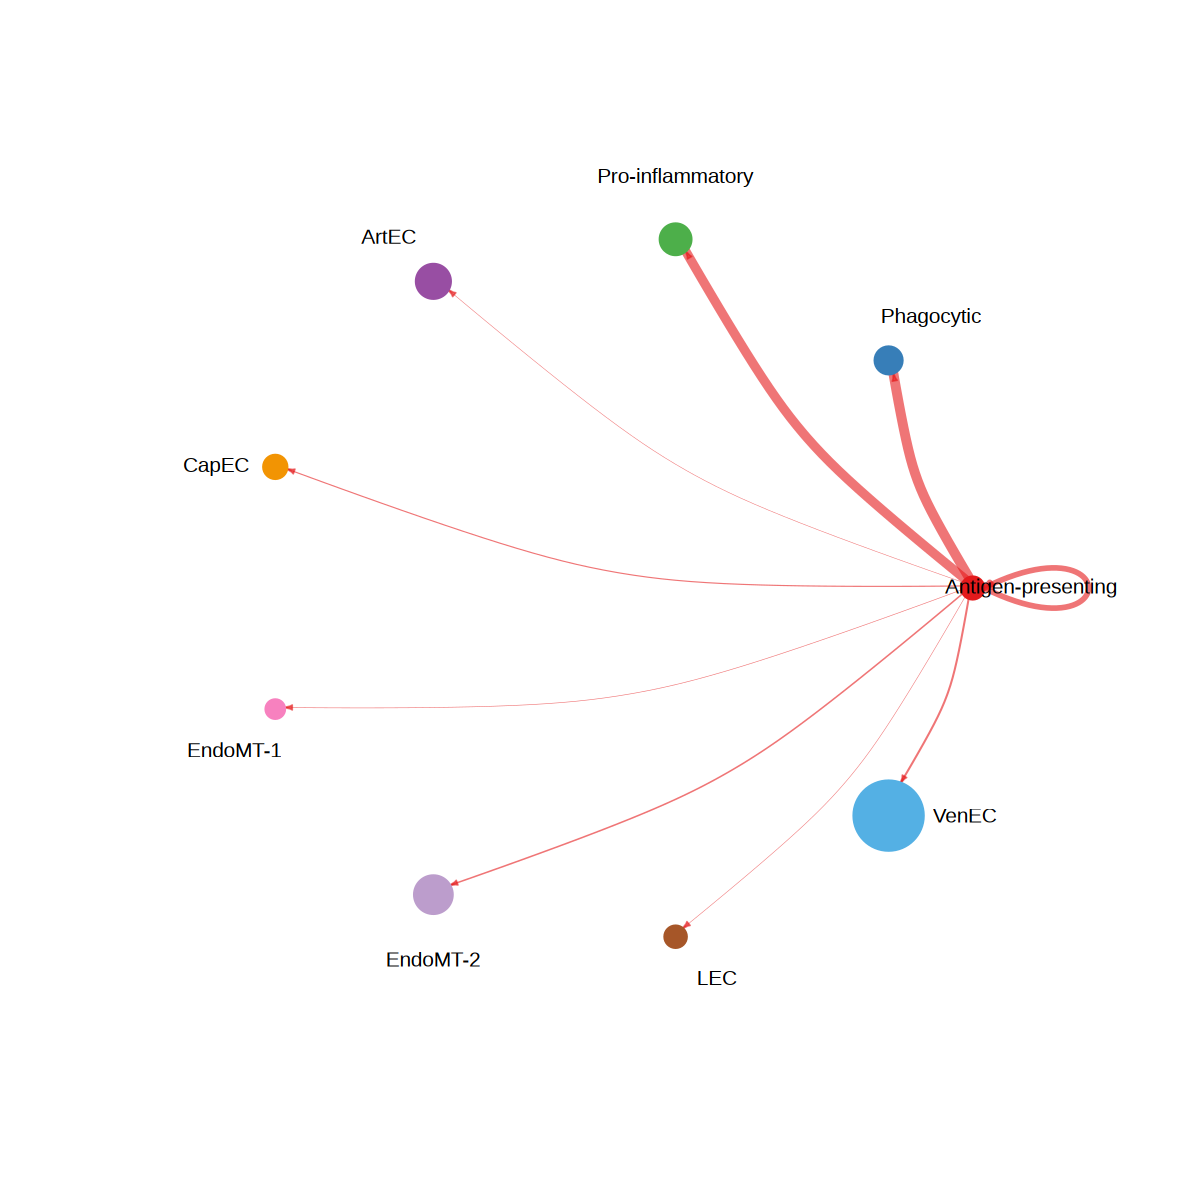

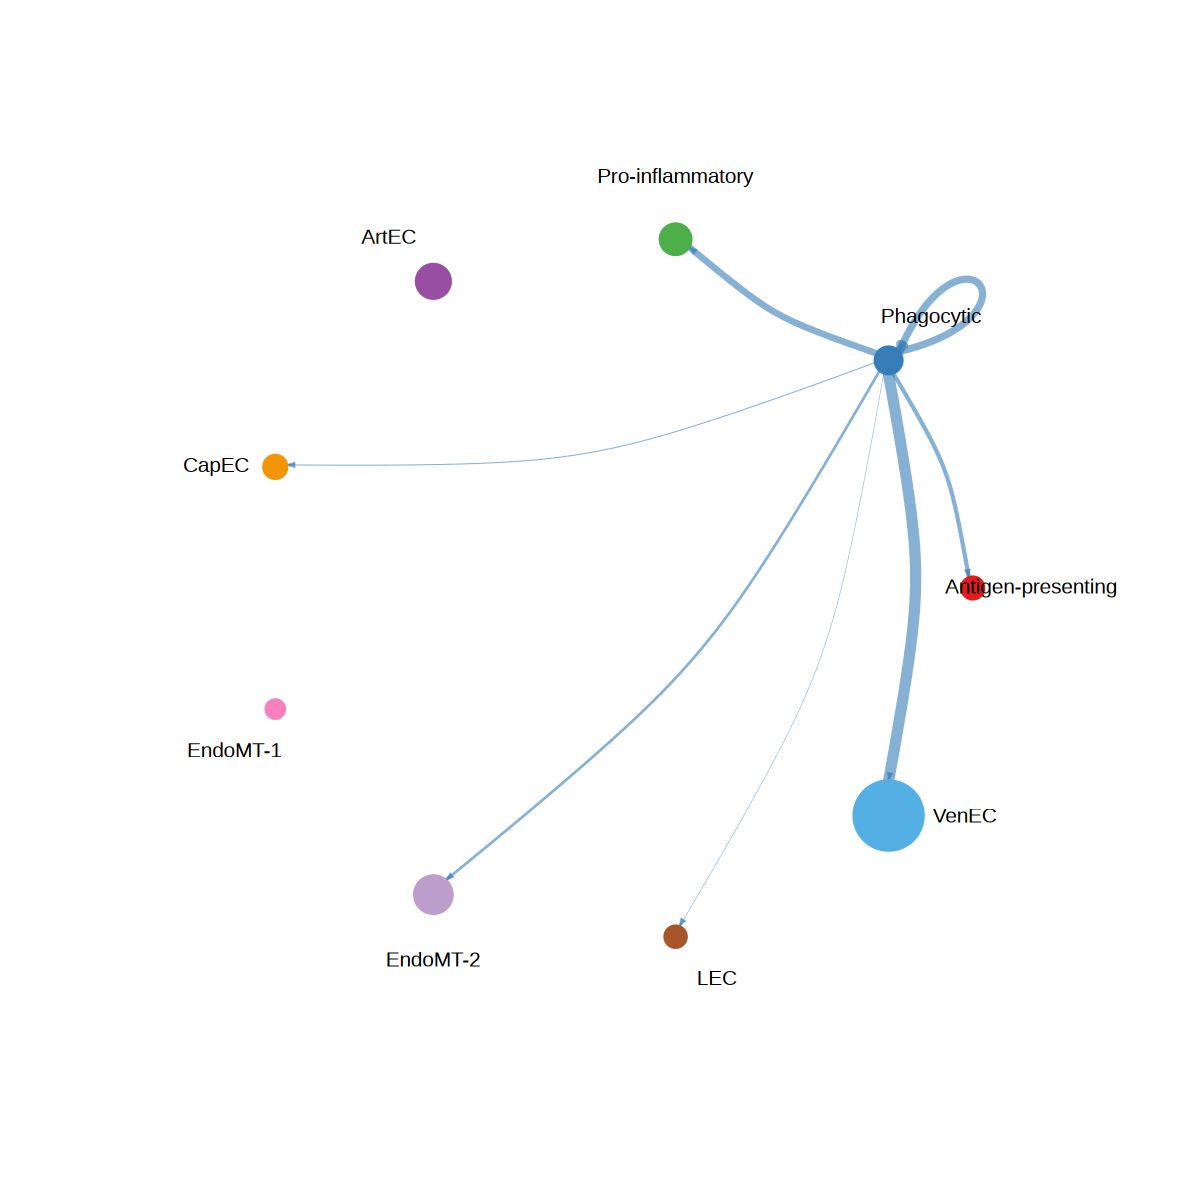

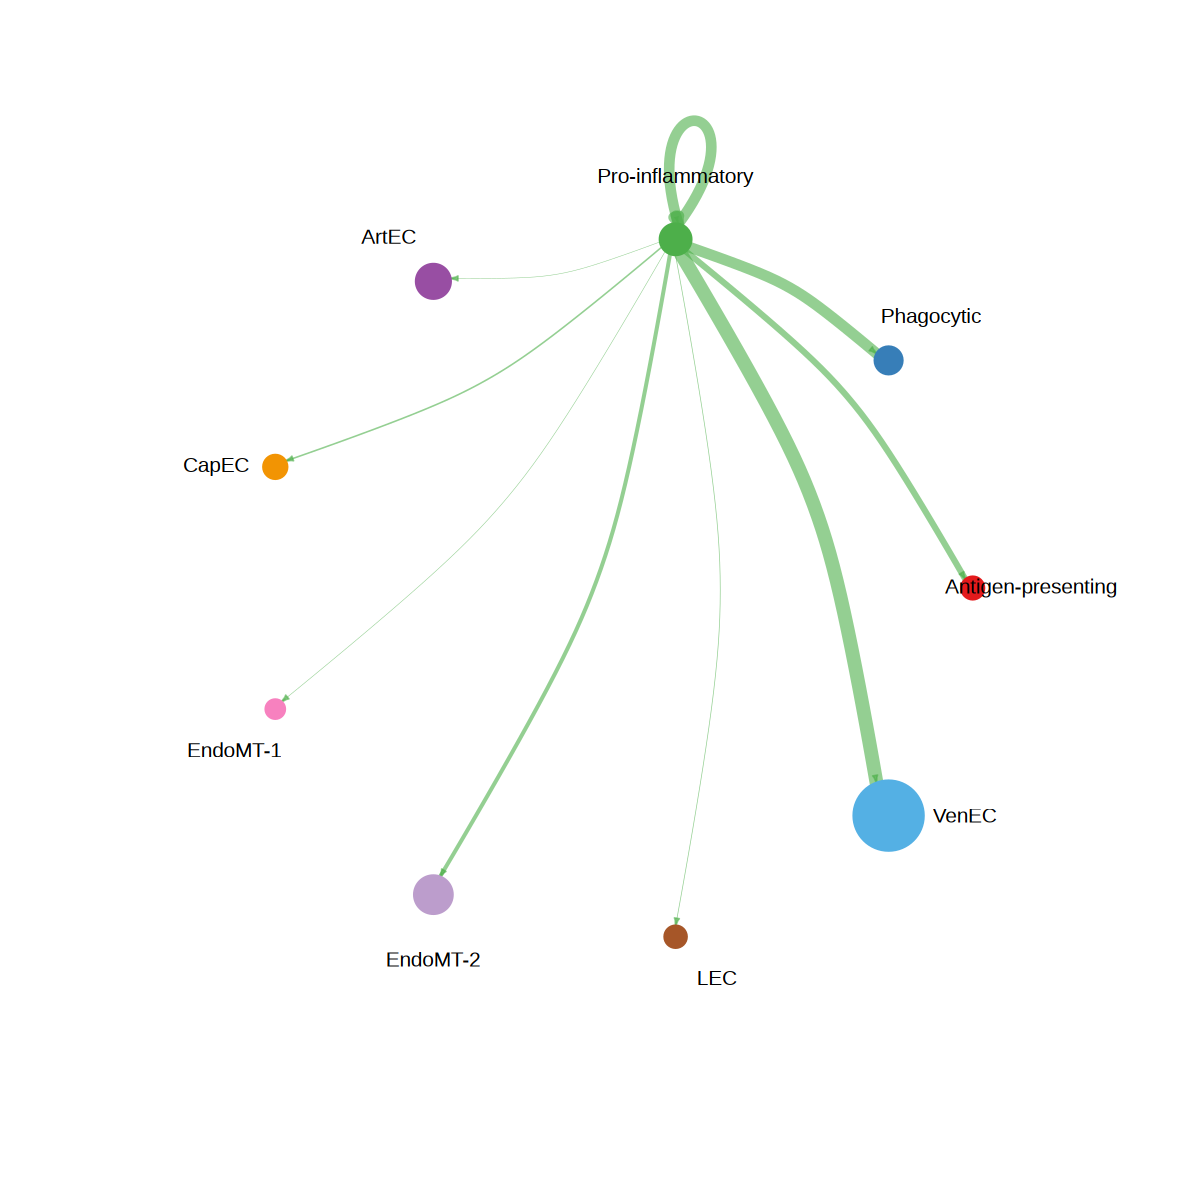

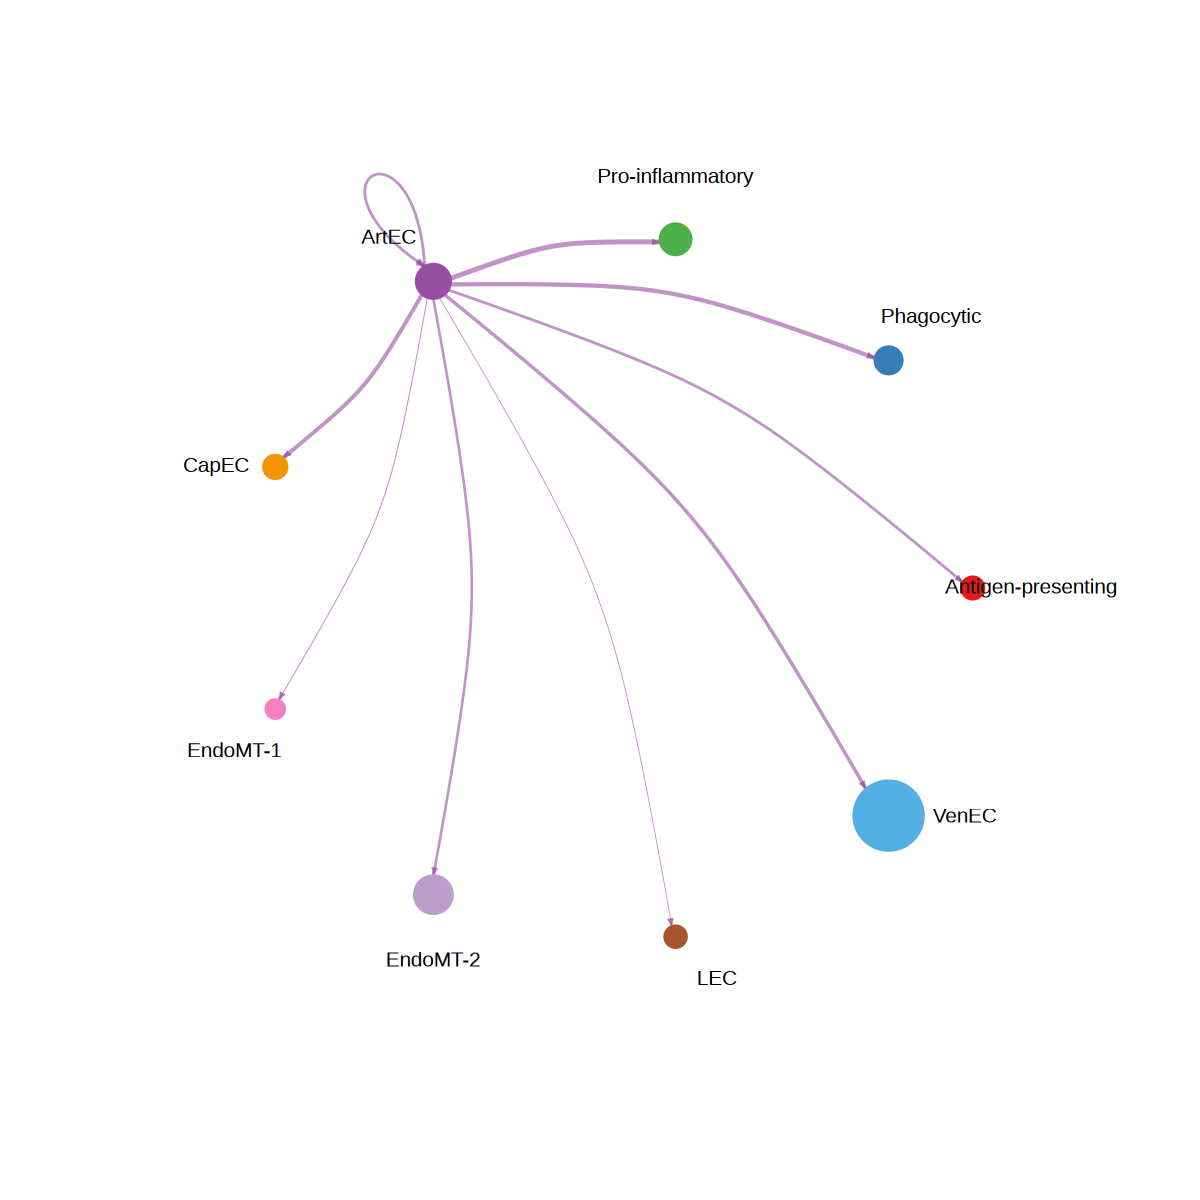

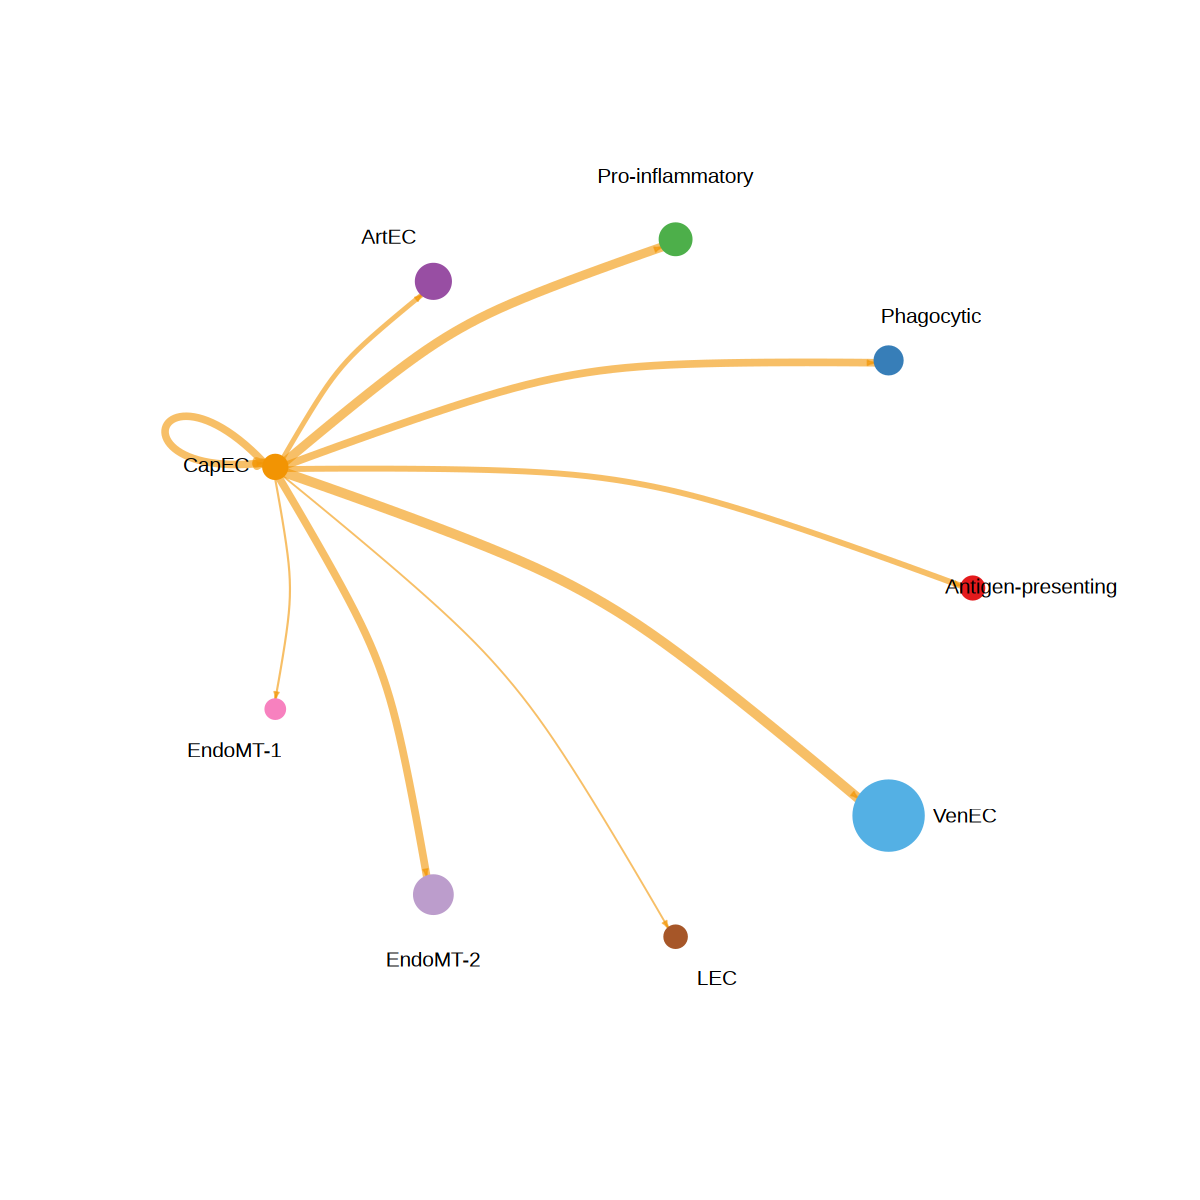

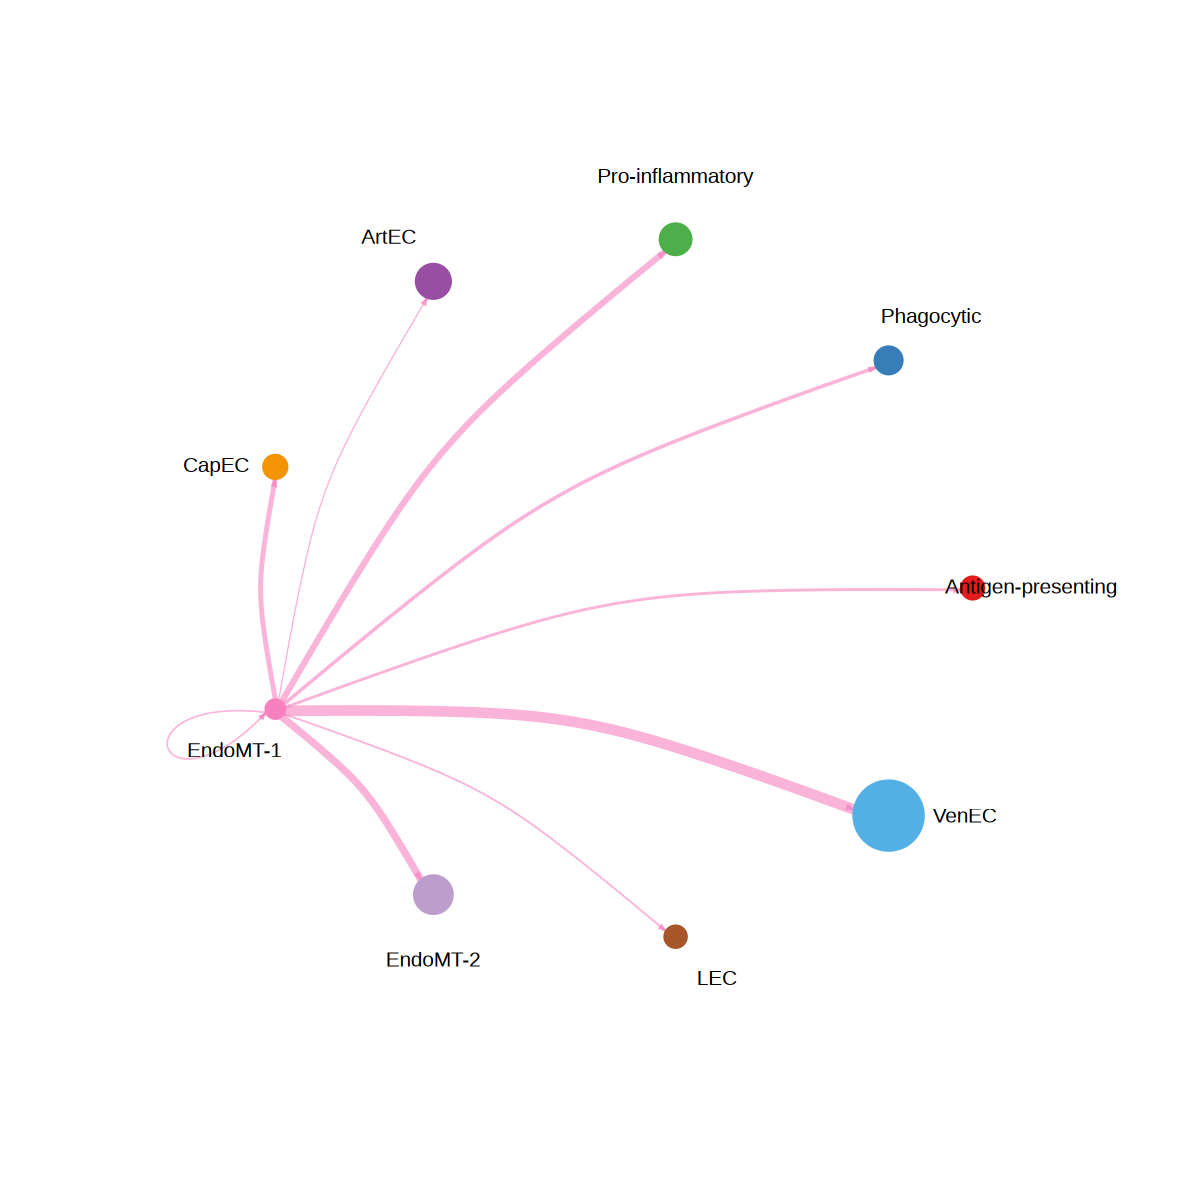

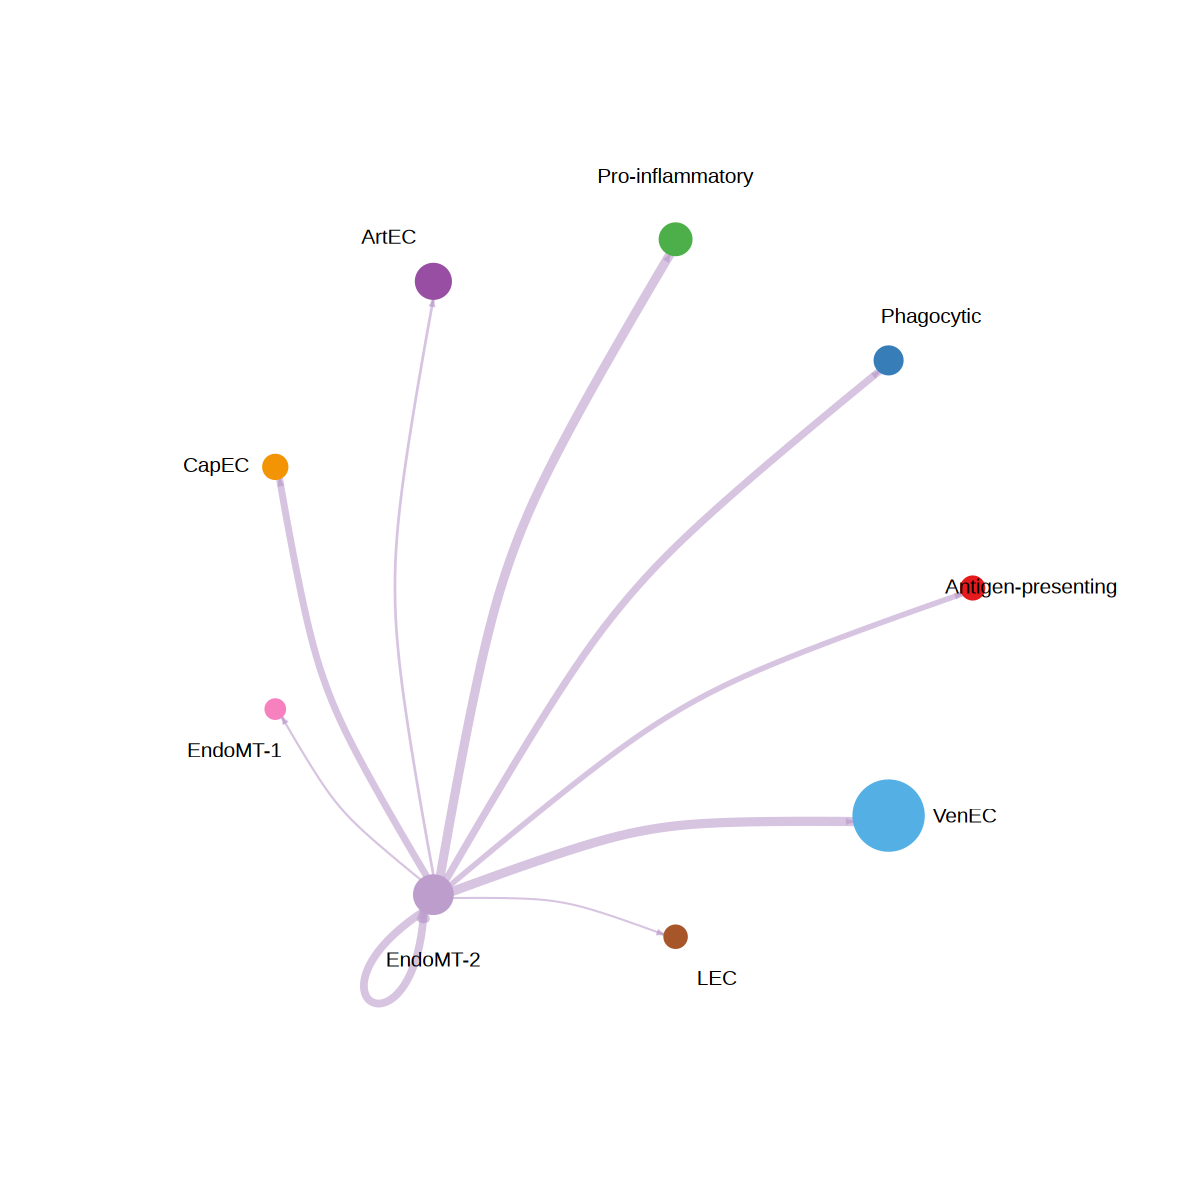

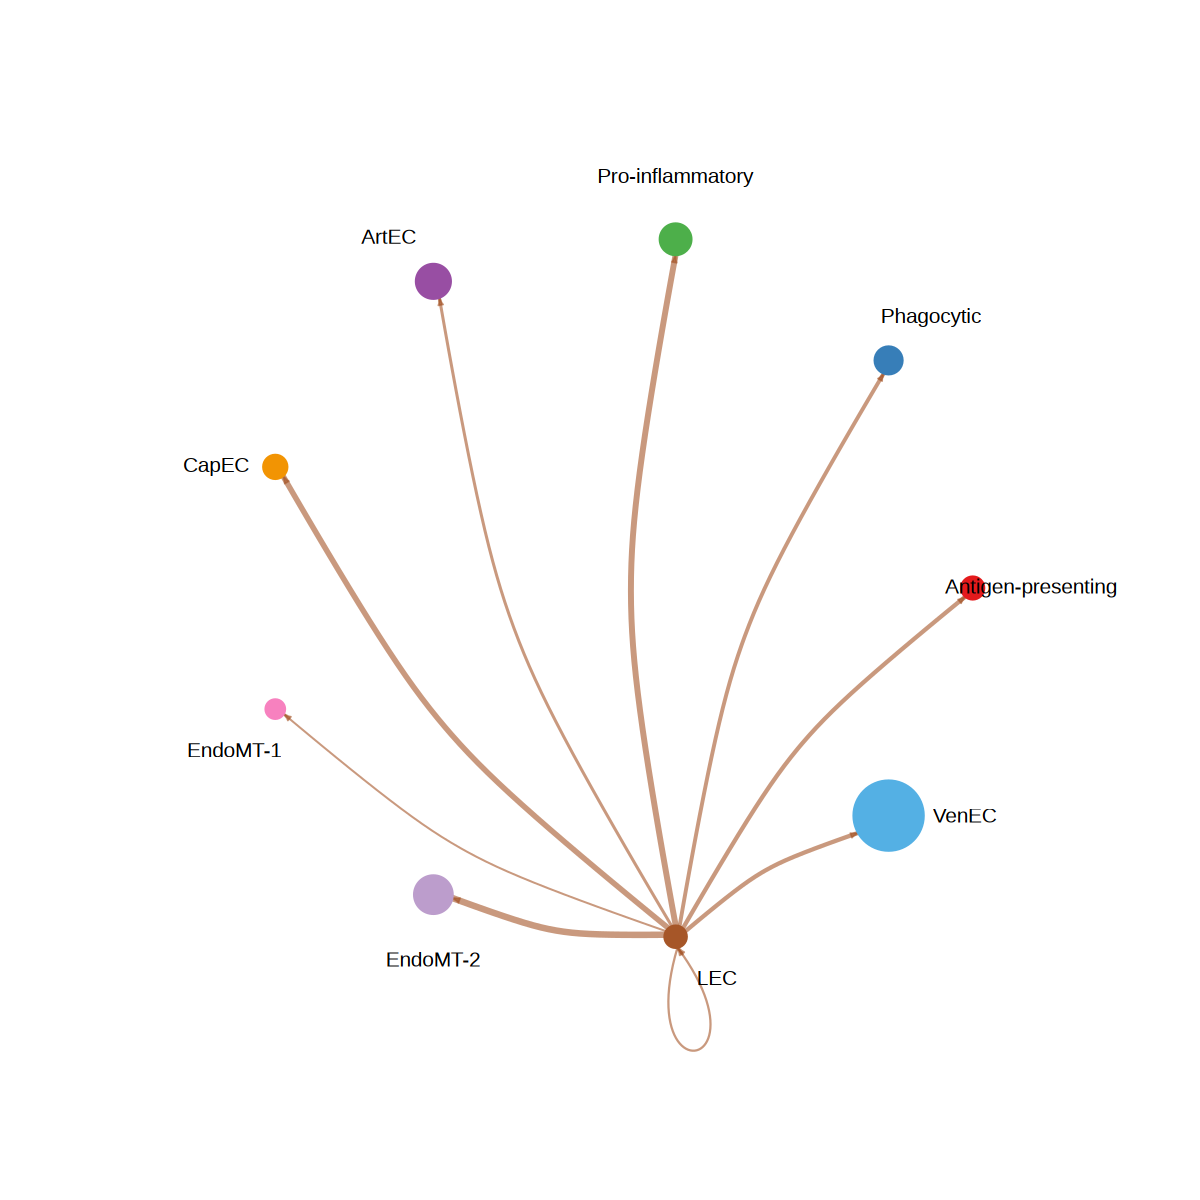

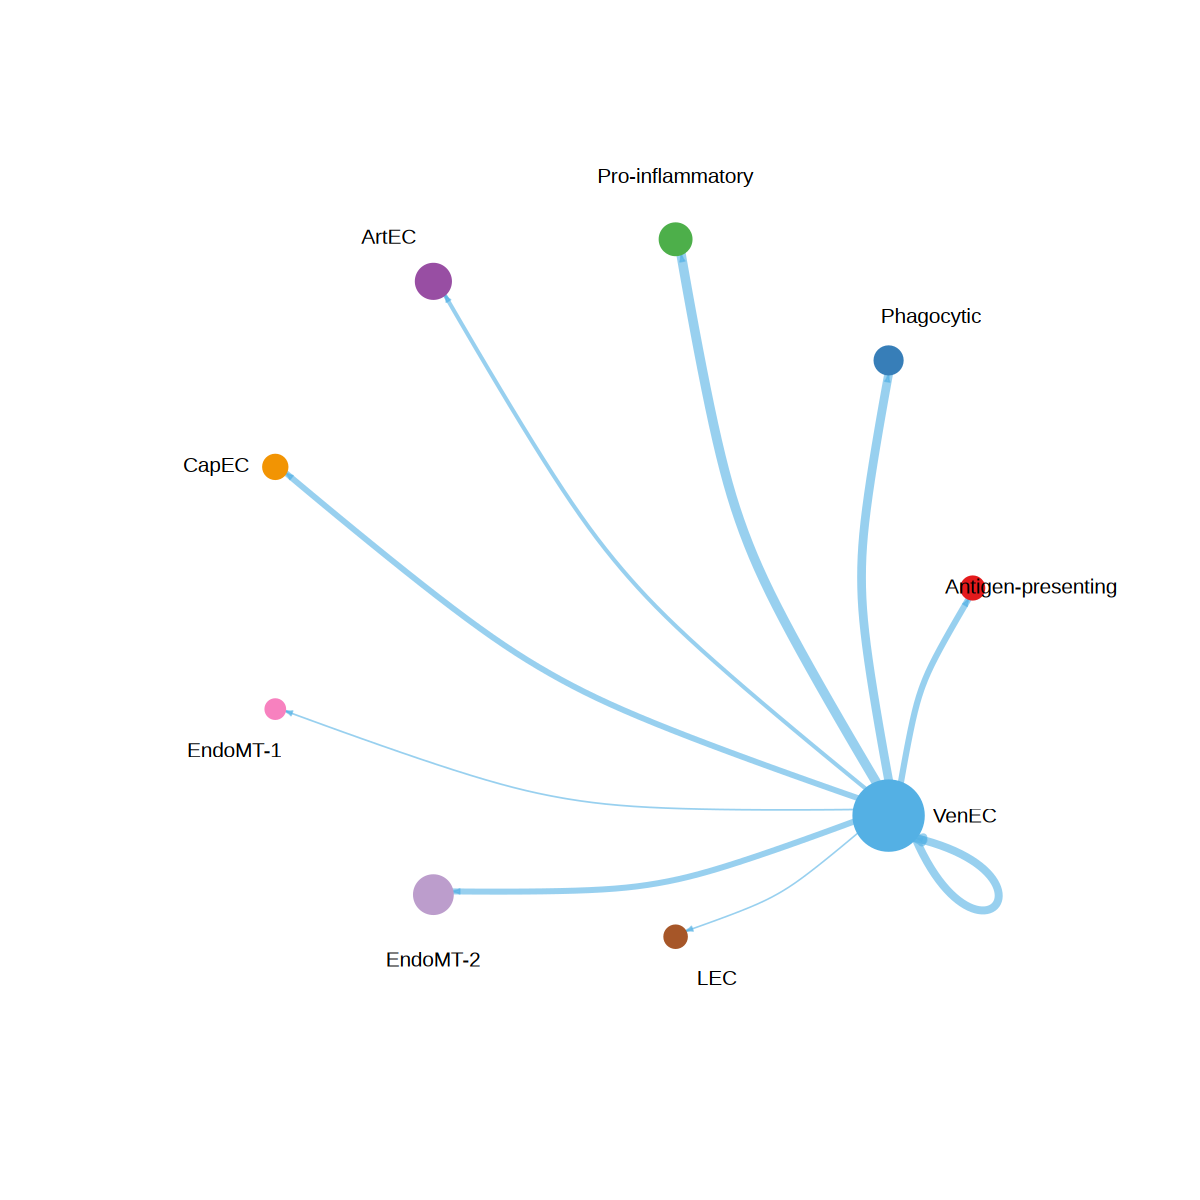

In [8]:
options(repr.plot.height = 10, repr.plot.width = 10)

mat <- cellchat@net$weight
#par(mfrow = c(3,4), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  p <- netVisual_circle(mat2, 
                        vertex.weight = groupSize, weight.scale = T, 
                        edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

Comparing communications on a single object 




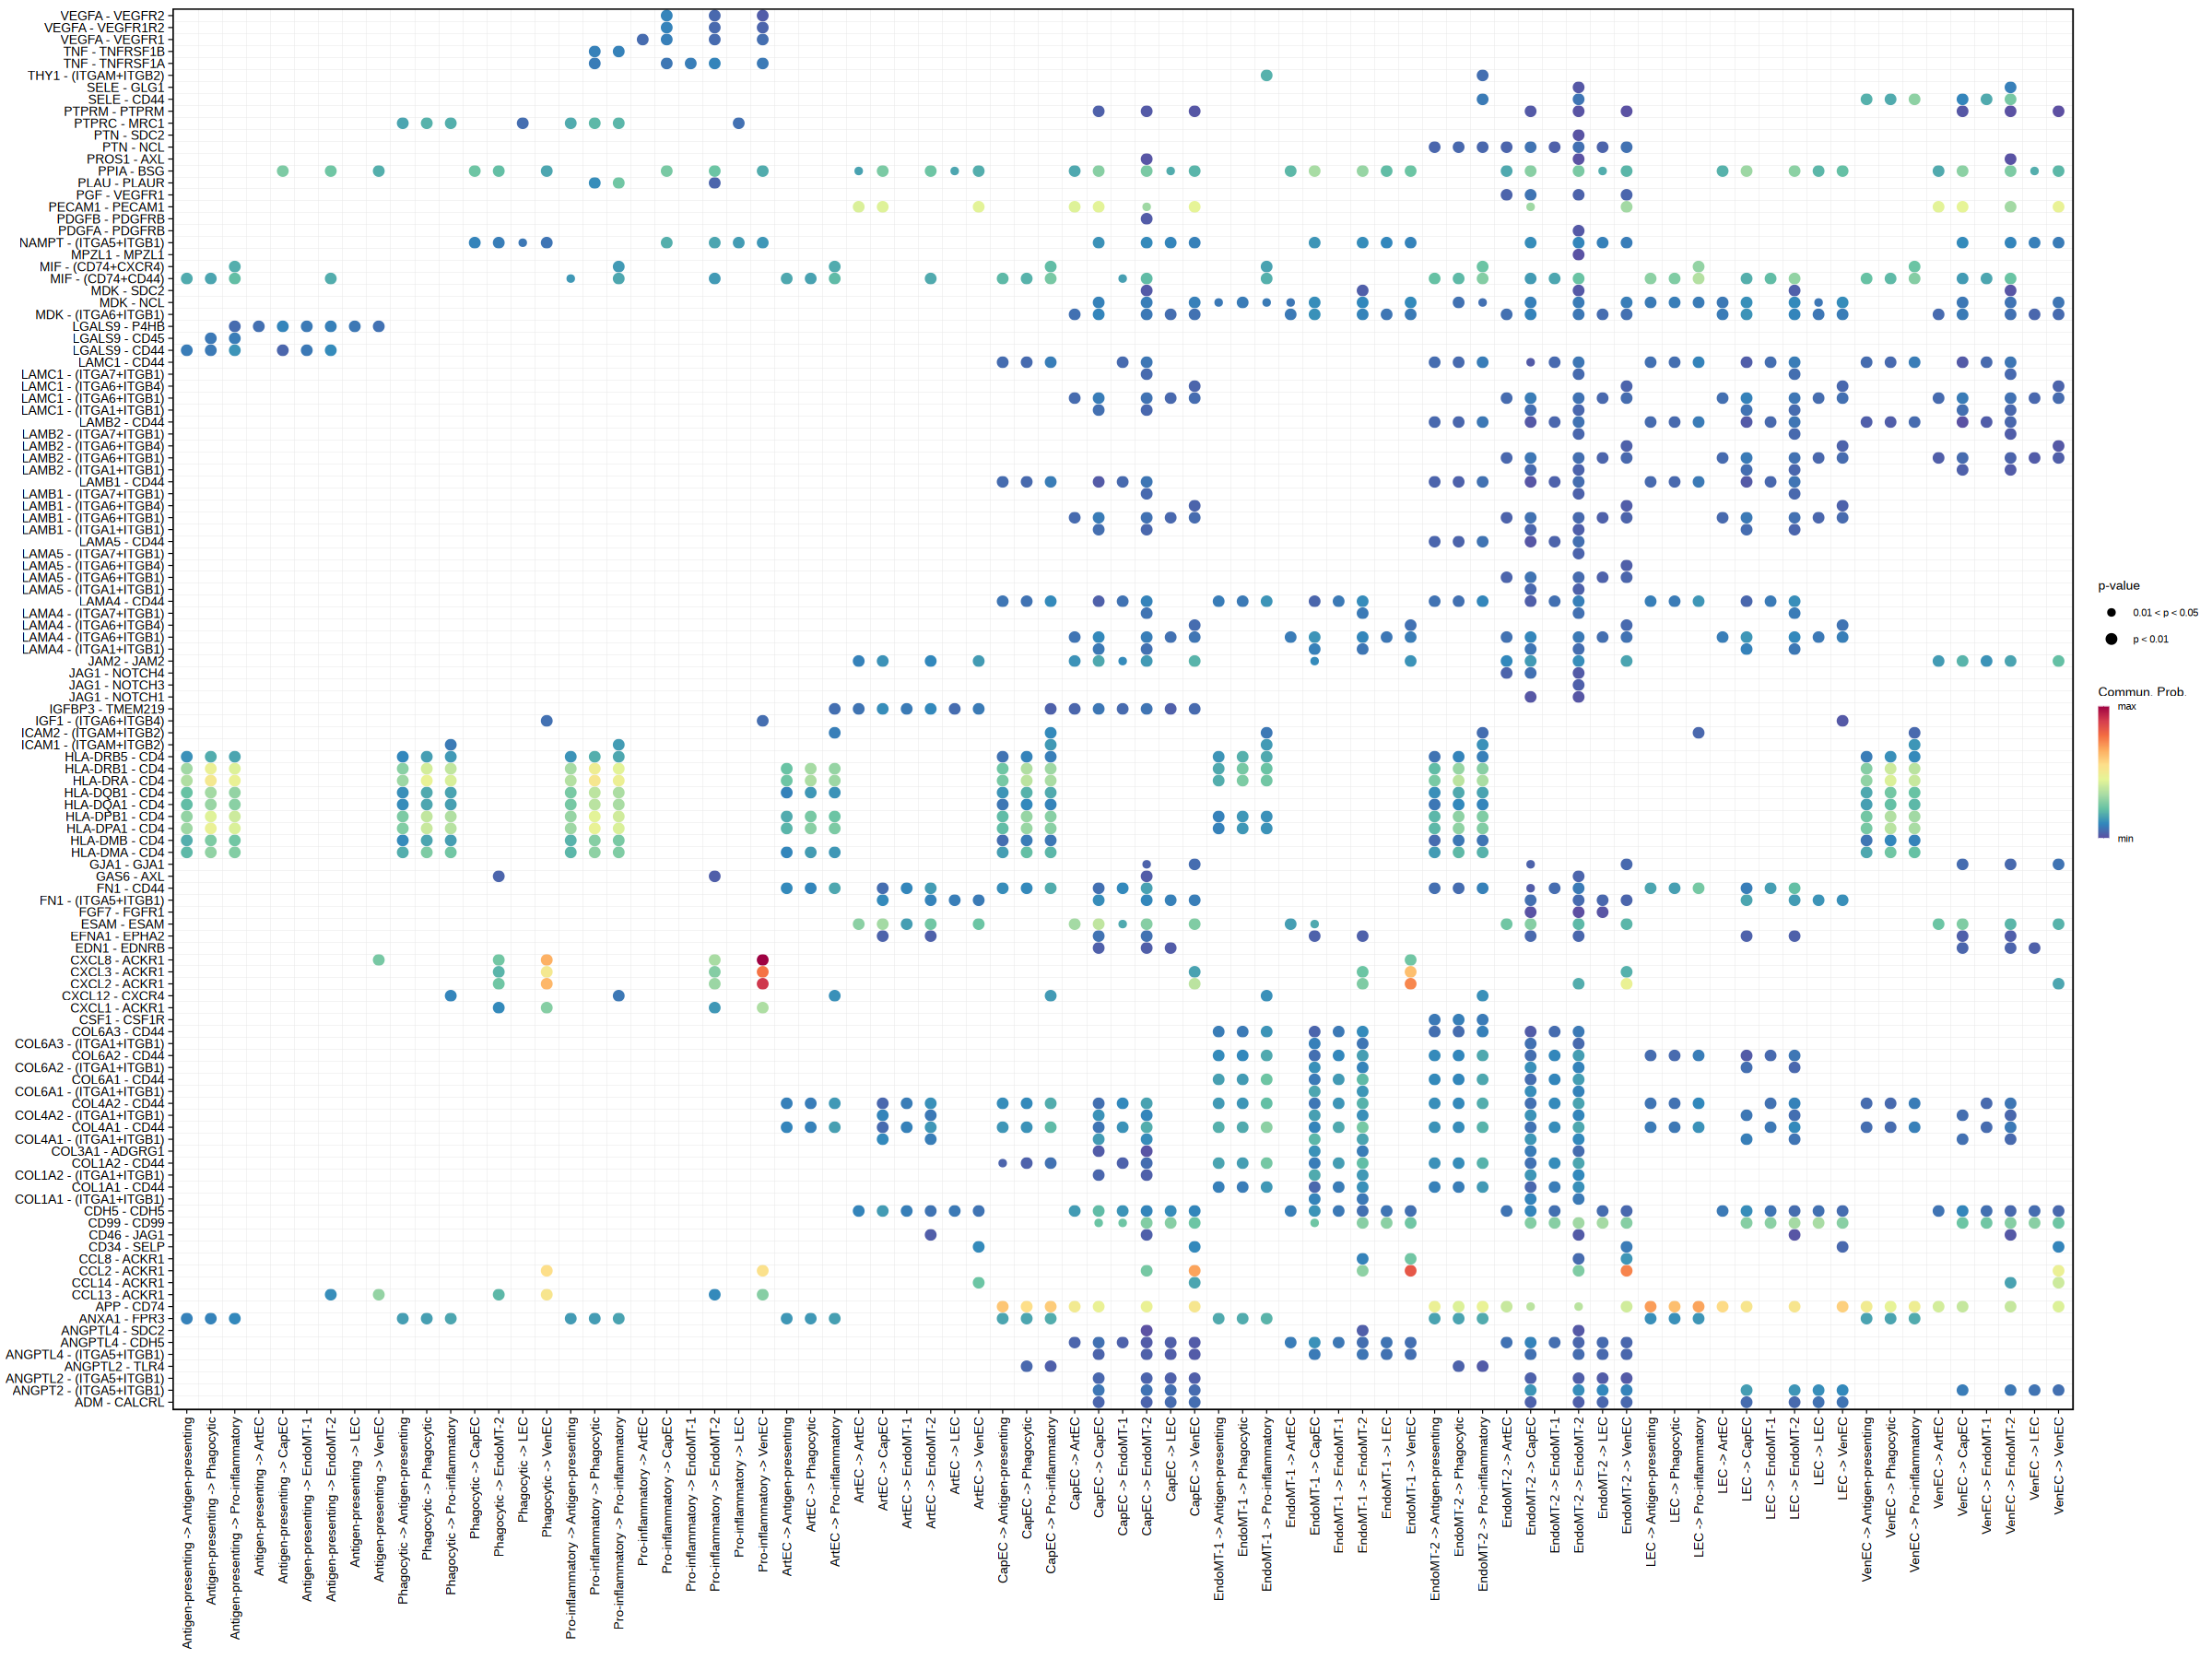

In [9]:
options(repr.plot.height = 15, repr.plot.width = 20)

netVisual_bubble(cellchat, remove.isolate = FALSE)